<a href="https://colab.research.google.com/github/JayeshHarjule/LetsUpgradeAI-ML/blob/master/Day17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Answer 1.** 

**Problem Statement:** Using the given MT cars dataset you need to find outlier with z score.

In [2]:
import pandas as pd
import os
import numpy as np
os.chdir('/content/drive/My Drive/')
df=pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.shape

(32, 12)

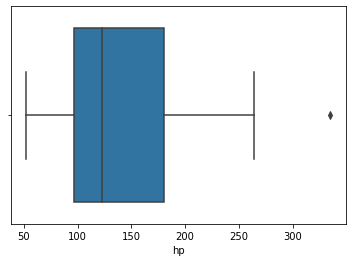

In [5]:
import seaborn as sns
sns.boxplot(data=df,x=df['hp'])

In [6]:
mean=np.mean(df['hp'])
std_dev=np.std(df['hp'])
print('mean of the dataset is' , mean) 
print('std. deviation is', std_dev)

mean of the dataset is 146.6875
std. deviation is 67.48307079371833


In [7]:
threshold=2
outlier= [ ]

for i in df['hp']:
    z=((i-mean)/std_dev)
    if z>threshold:
            outlier.append(i)
        
print('outlier in dataset is', outlier)

outlier in dataset is [335]


**Answer 2.**

**Problem Statement:**  Using the Boston data set from sklearn, find out the Outlier and treat them.

In [9]:
from sklearn.datasets import load_boston
boston=load_boston()
columns = boston.feature_names

boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df.shape

(506, 13)

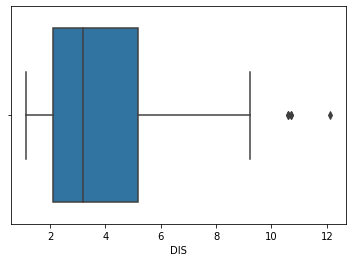

In [11]:
sns.boxplot(data=boston_df,x='DIS')

In [12]:
mean=np.mean(boston_df["DIS"])
print('mean =',mean)

mean = 3.795042687747034


In [13]:
std=np.std(boston_df['DIS'])
print('std=',std)

std= 2.103628356344459


In [14]:
threshold=3
outl=[]
for i in boston_df['DIS']:
    z=(i-mean)/std
    if z>threshold:
        outl.append(i)
print(outl)

[10.7103, 10.7103, 12.1265, 10.5857, 10.5857]


In [15]:
Q1=boston_df["DIS"].quantile(0.25)
Q3=boston_df["DIS"].quantile(0.75)

IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.100175
5.1884250000000005
3.0882500000000004


In [16]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print(lower_whisker,upper_whisker)

-2.5322000000000005 9.820800000000002


In [17]:
boston_df=boston_df[boston_df["DIS"]<upper_whisker]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
boston_df.shape

(501, 13)

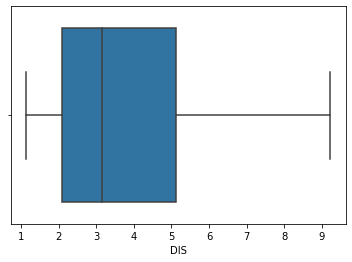

In [19]:
sns.boxplot(data=boston_df,x='DIS')